# Data preprocessing

## Image Augmentations

In [17]:
import tensorflow as tf
import albumentations as A

transform = A.Compose([
    A.Resize(200, 200),
    A.RandomCrop(width=180, height=180), 
    A.RGBShift(p=0.2), 
    A.RandomGamma(p=0.2), 
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5), 
    A.RandomBrightnessContrast(p=0.2),
])

In [18]:
import os
from symbol import except_clause
import cv2

for label in ['no', 'yes']:
    path = os.path.join('data', label)
    for file in os.listdir(path):
        image = cv2.imread(os.path.join(path, file))

        for i in range(10):
            transformed = transform(image=image)
            cv2.imwrite(os.path.join(path, f'{file.split(".")[0]}.{i}.jpg'), transformed['image'])
            # try:
            #     os.remove(os.path.join(path, f'{file.split(".")[0]}.{i}.jpg'))
            # except:
            #     pass

## Splitting data into sets

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory('data/', validation_split=0.2, subset="training", seed=69, image_size=(200, 200))
val_ds = tf.keras.utils.image_dataset_from_directory('data/', validation_split=0.2, subset="validation", seed=69, image_size=(200, 200))
test_ds = tf.keras.utils.image_dataset_from_directory('test/', image_size=(200, 200))

Found 2487 files belonging to 2 classes.
Using 1990 files for training.
Found 2487 files belonging to 2 classes.
Using 497 files for validation.
Found 26 files belonging to 2 classes.


In [20]:
class_names = train_ds.class_names
class_names

['no', 'yes']

## Data visualization

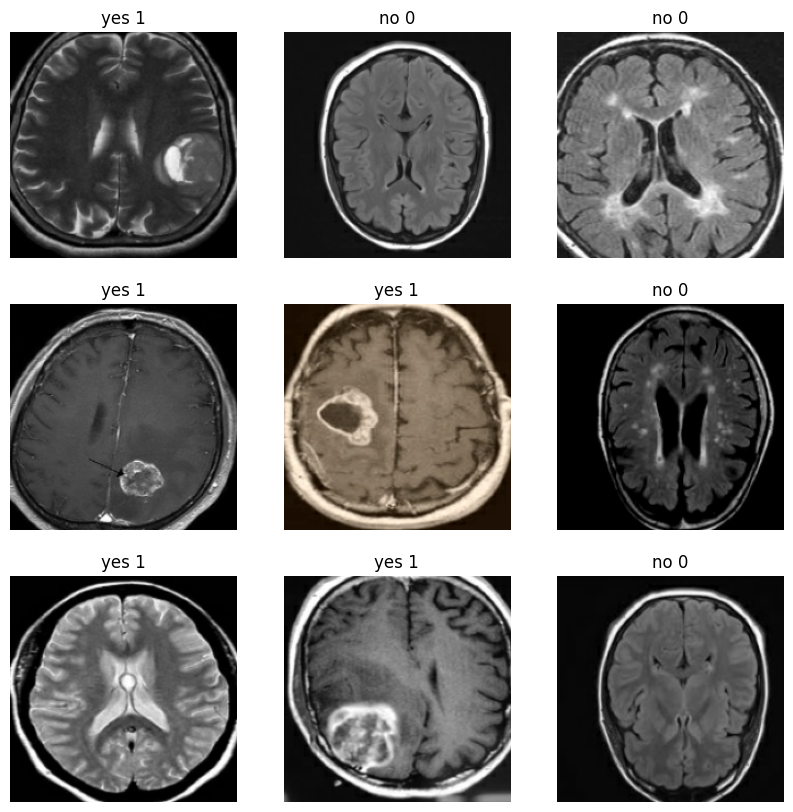

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]] + ' ' + str(labels[i].numpy()))
    plt.axis("off")

## Normalization

In [22]:
train_ds = train_ds.map(lambda x, l: (x/255, l))
val_ds = val_ds.map(lambda x, l: (x/255, l))
test_ds = test_ds.map(lambda x, l: (x/255, l))

In [23]:
train_ds.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

# Model
## Creating the model

In [37]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout
from tensorflow.keras import Sequential

model = Sequential([
    Input(shape=(200, 200, 3)),
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 8)       224       
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 8)       584       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 8)         584       
                                                                 
 conv2d_11 (Conv2D)          (None, 94, 94, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 8)        0         
 2D)                                                  

## Training

In [39]:
hist = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
63/63 [==============================] - 15s 224ms/step - loss: 0.6167 - accuracy: 0.6884 - val_loss: 0.5347 - val_accuracy: 0.7928
Epoch 2/20
63/63 [==============================] - 15s 229ms/step - loss: 0.5584 - accuracy: 0.7347 - val_loss: 0.4426 - val_accuracy: 0.8008
Epoch 3/20
63/63 [==============================] - 15s 233ms/step - loss: 0.5229 - accuracy: 0.7593 - val_loss: 0.4729 - val_accuracy: 0.8048
Epoch 4/20
63/63 [==============================] - 15s 237ms/step - loss: 0.4665 - accuracy: 0.7874 - val_loss: 0.4261 - val_accuracy: 0.8129
Epoch 5/20
63/63 [==============================] - 15s 238ms/step - loss: 0.4122 - accuracy: 0.8030 - val_loss: 0.3977 - val_accuracy: 0.8310
Epoch 6/20
63/63 [==============================] - 15s 239ms/step - loss: 0.3957 - accuracy: 0.8241 - val_loss: 0.4176 - val_accuracy: 0.8270
Epoch 7/20
63/63 [==============================] - 15s 240ms/step - loss: 0.4171 - accuracy: 0.8126 - val_loss: 0.4200 - val_accuracy: 0.8209

## Plotting loss and accuracy

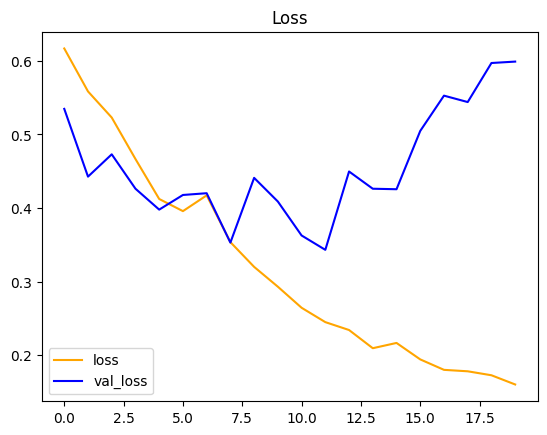

In [40]:
plt.plot(hist.history['loss'], color='orange', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

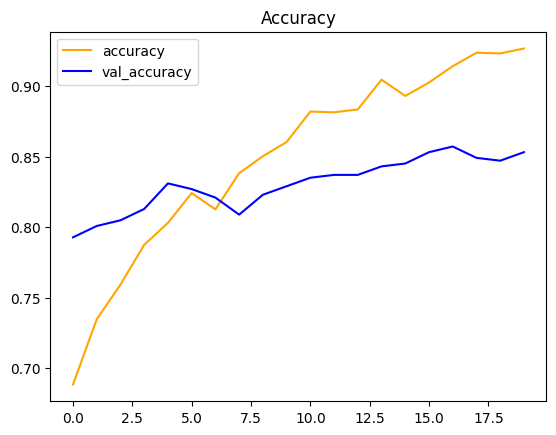

In [41]:
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [42]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 63ms/step - loss: 0.6556 - accuracy: 0.9231


[0.6556292176246643, 0.9230769276618958]

## Making predictions on a few images

1/1 [==============================] - 0s 13ms/step


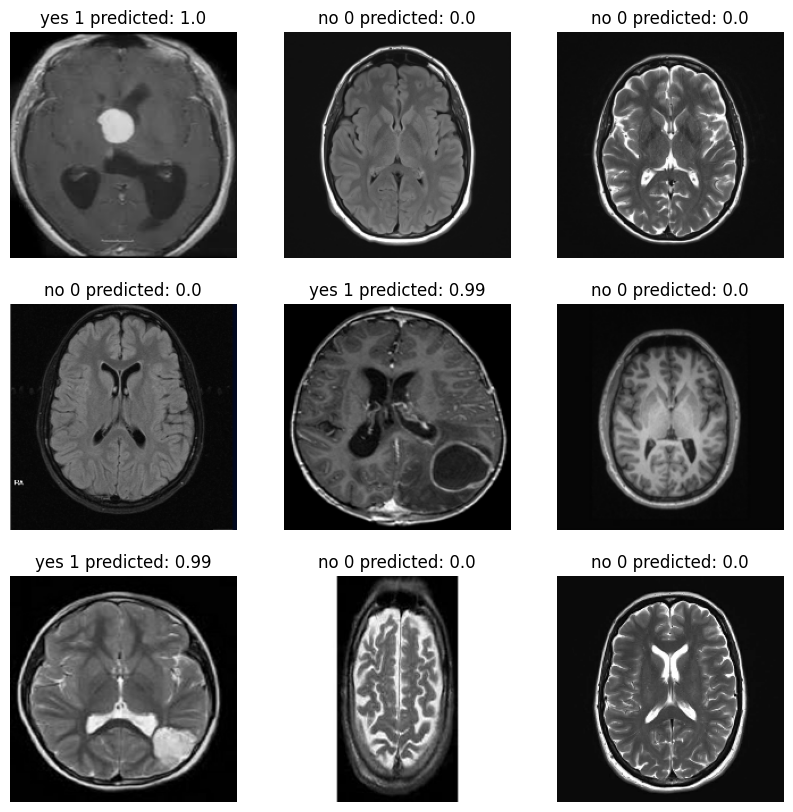

In [48]:
import numpy as np


plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    image = images[i] * [255, 255, 255]


    predicted = model.predict(np.expand_dims(images[i], 0))
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_names[labels[i]] + ' ' + str(labels[i].numpy()) + ' predicted: ' +str(round(predicted[0][0], 2)))
    plt.axis("off")

# What CNN sees

8


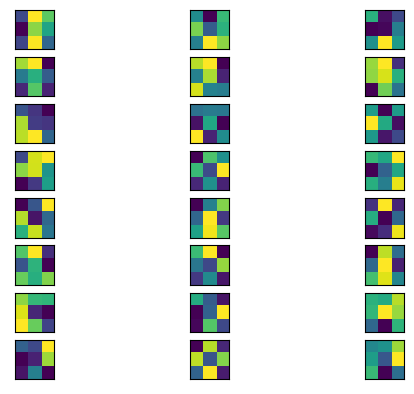

8


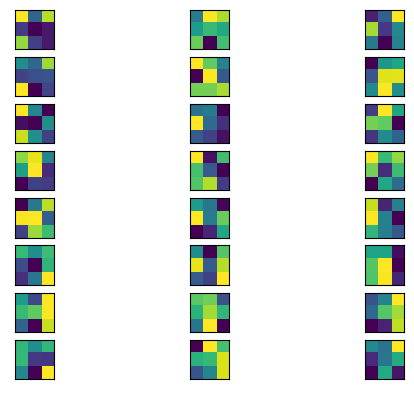

8


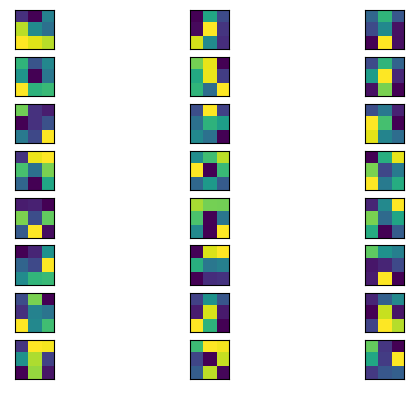

8


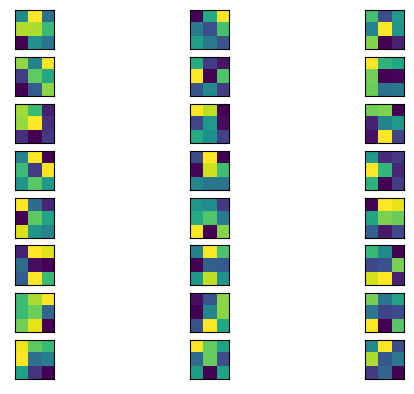

In [49]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

1/1 [==============================] - 0s 55ms/step
(1, 196, 196, 8)
(1, 98, 98, 8)
(1, 96, 96, 8)
(1, 94, 94, 8)
(1, 47, 47, 8)
(1, 17672)
(1, 10)
(1, 10)
(1, 1)


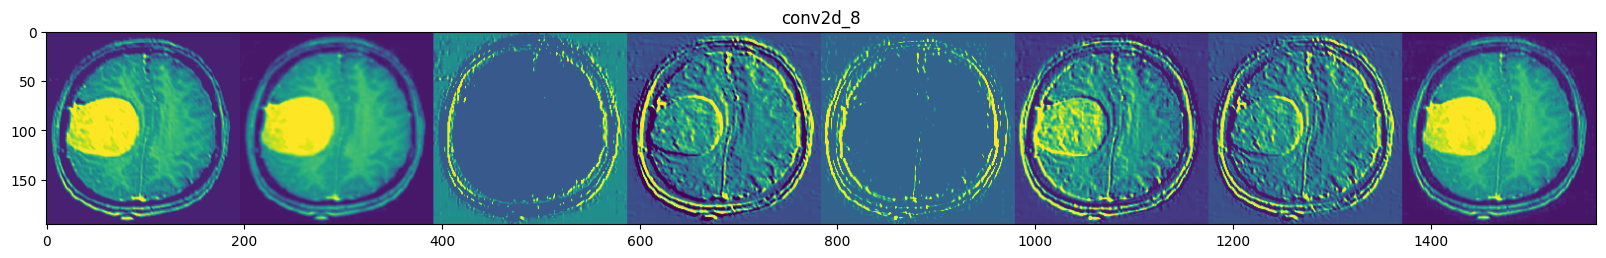

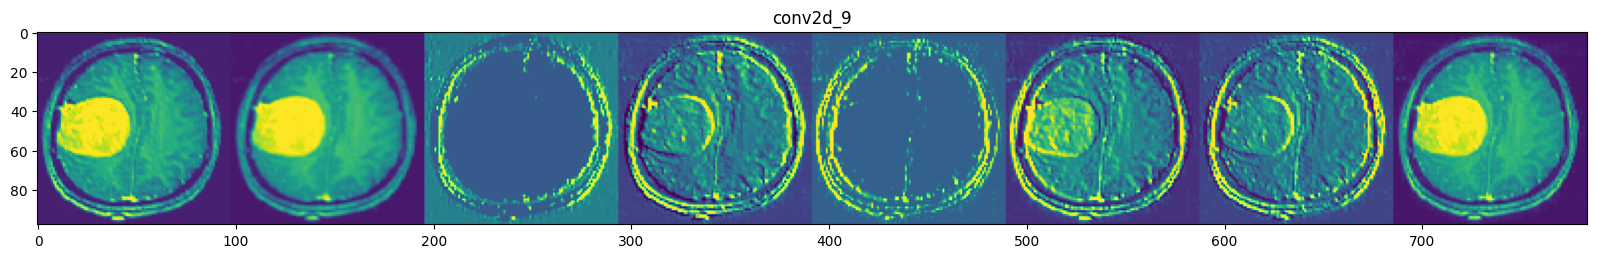

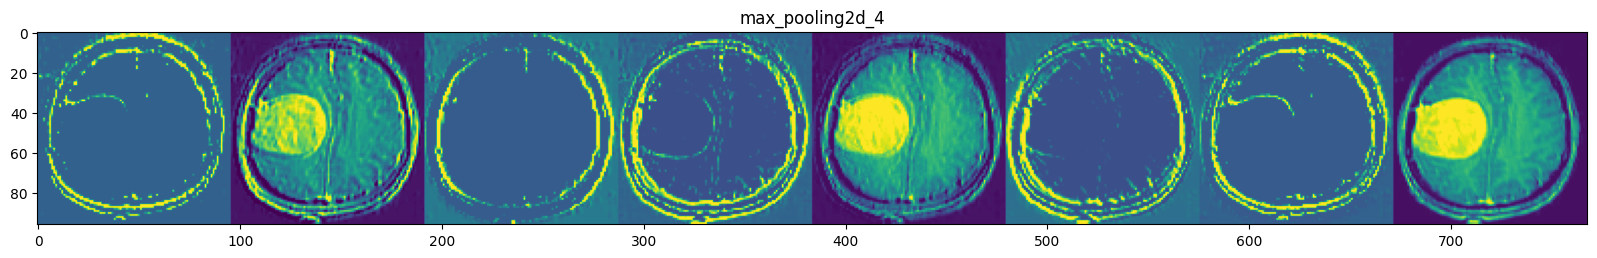

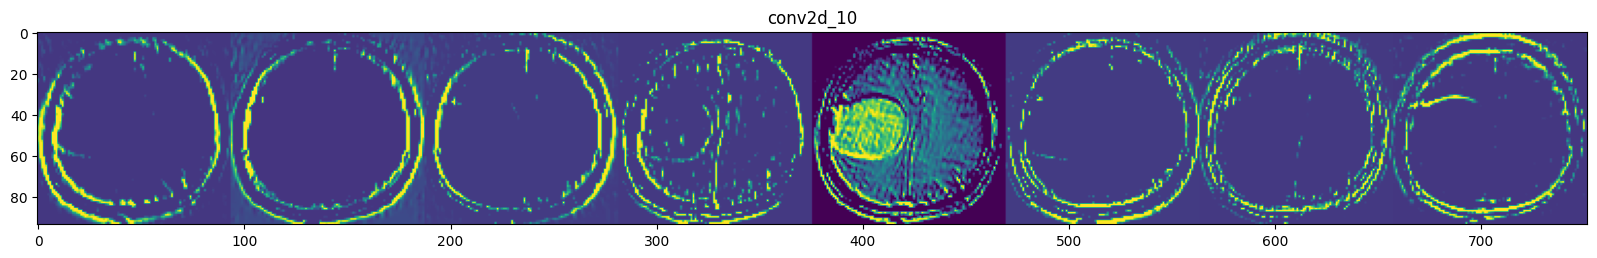

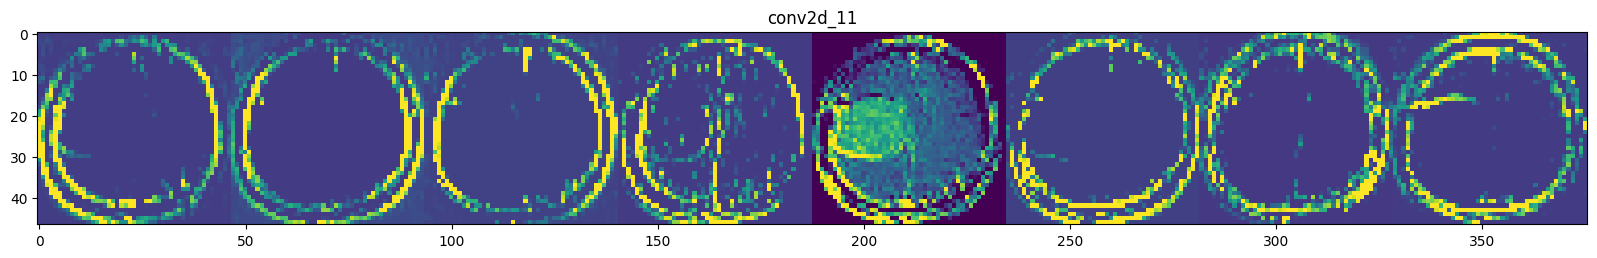

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img_path='data/yes/Y1.jpg' #dog
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = load_img(img_path, target_size=(200, 200))
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
   
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 50ms/step
(1, 196, 196, 8)
(1, 98, 98, 8)
(1, 96, 96, 4)
(1, 94, 94, 4)
(1, 47, 47, 4)
(1, 8836)
(1, 10)
(1, 10)
(1, 1)


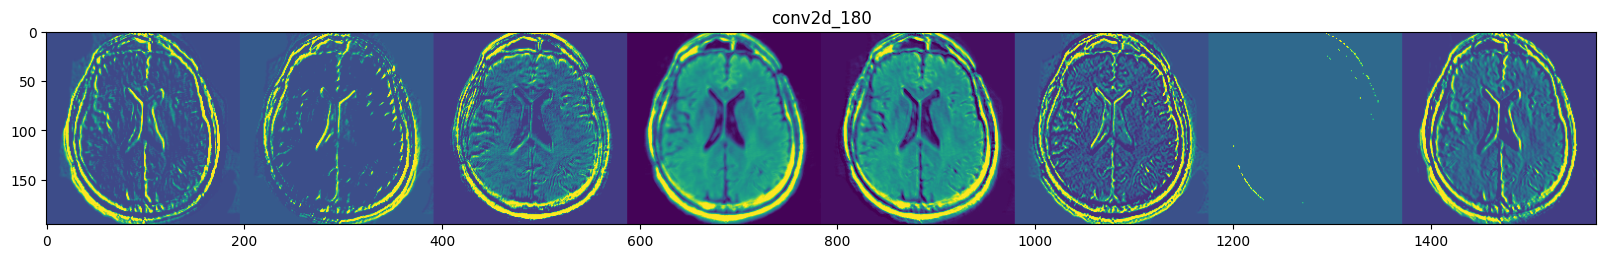

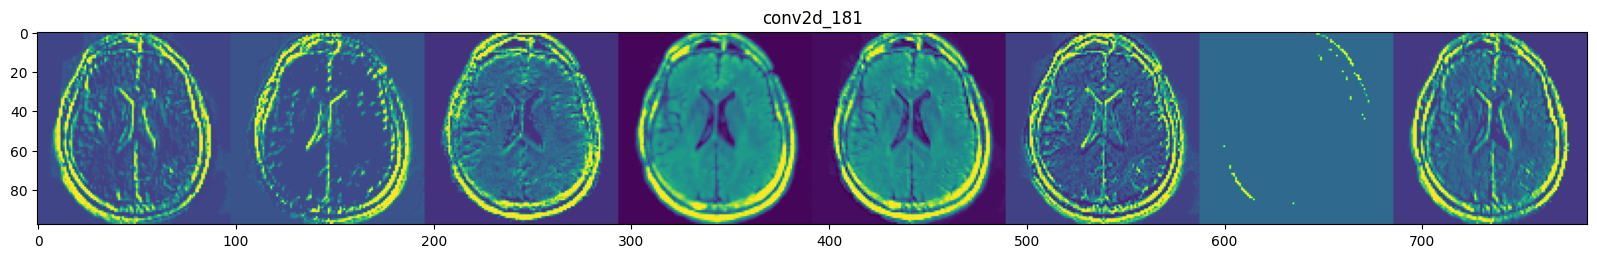

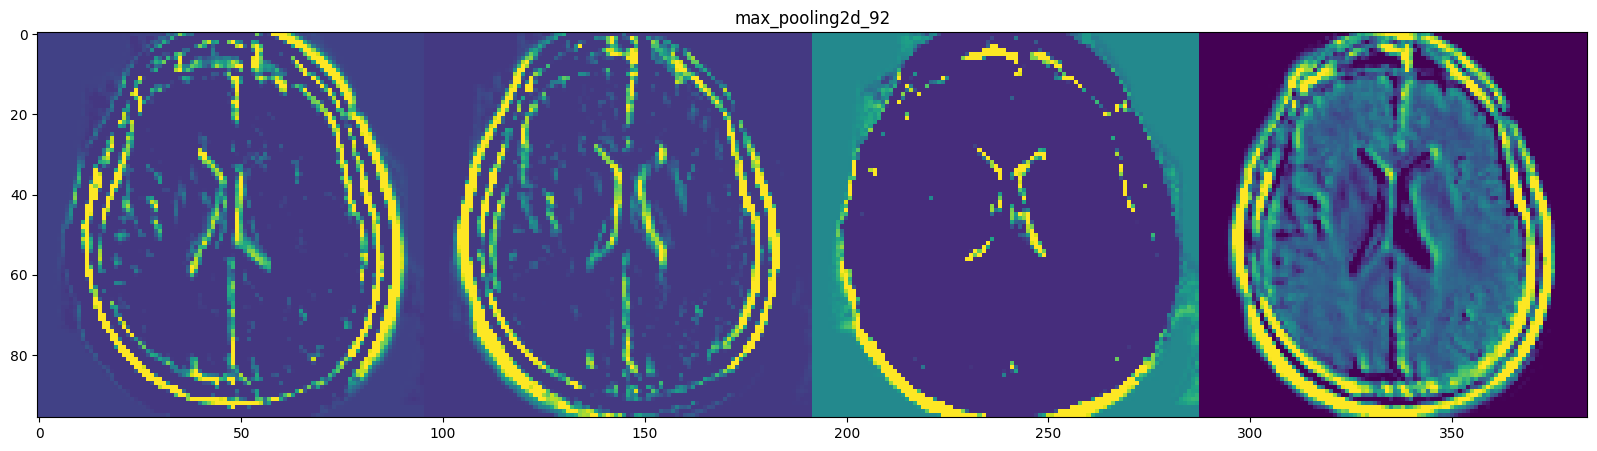

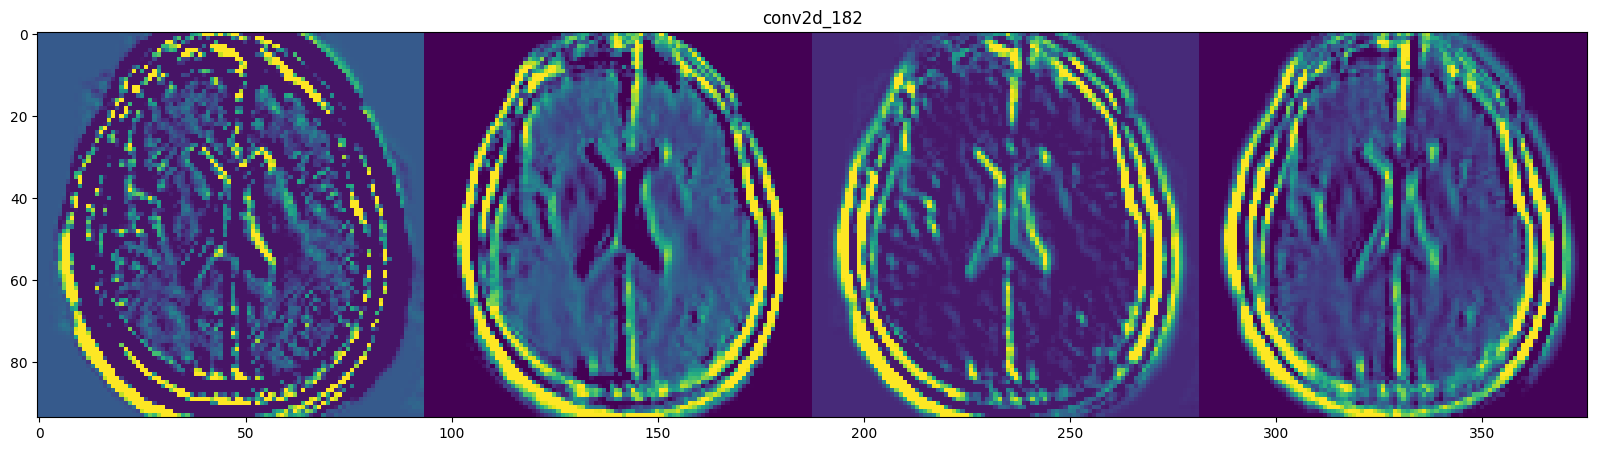

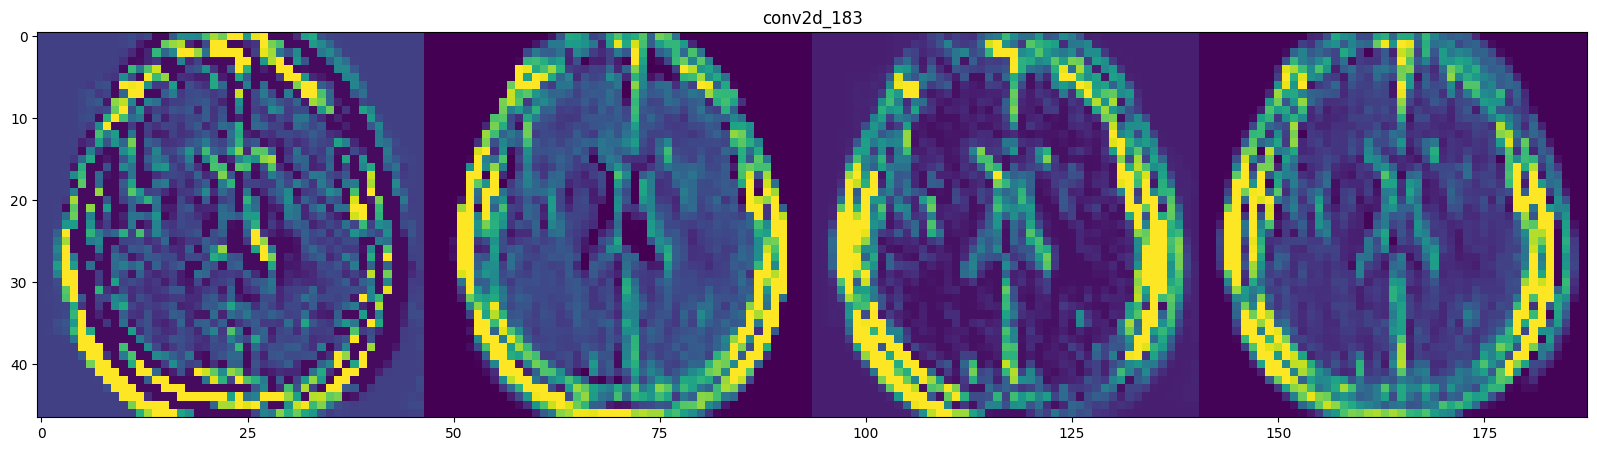

In [345]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img_path='data/no/7 no.jpg' #dog
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = load_img(img_path, target_size=(200, 200))
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
   
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )